**Basic Stuff **

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import layers , models , datasets

In [ ]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

# normalizing

train_images = train_images/255
test_images = test_images/255

# defining classes

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 3s 0us/step


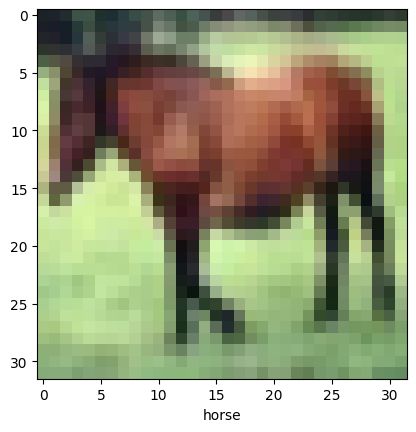

In [ ]:
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]]) # the zero is because train_labels contains single element arrays of all elements
plt.show()

In [ ]:
print(train_labels[:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


We extract features from data using convolution base

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

use thise features to actually see if they exist in data

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense((64),activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs = 10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 26s 7ms/step - loss: 1.5379 - accuracy: 0.4408 - val_loss: 1.2940 - val_accuracy: 0.5418
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1730 - accuracy: 0.5868 - val_loss: 1.0806 - val_accuracy: 0.6230
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0160 - accuracy: 0.6438 - val_loss: 1.0057 - val_accuracy: 0.6498
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9203 - accuracy: 0.6796 - val_loss: 0.9463 - val_accuracy: 0.6735
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8502 - accuracy: 0.7027 - val_loss: 0.8891 - val_accuracy: 0.6929
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7885 - accuracy: 0.7230 - val_loss: 0.8924 - val_accuracy: 0.6927
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7426 - accuracy: 0.7379 - val_loss: 0.8780 - val_accu

In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.8655 - accuracy: 0.7104 - 1s/epoch - 3ms/step
0.7103999853134155


In [ ]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


for num in range (10,15):
  predict(model, test_images[num],test_labels[num][0])

## Data augmentation

In [ ]:
from keras.preprocessing import image   #  sort of like open cv for preprocessing image data
from keras.preprocessing.image import ImageDataGenerator  # creates a genreator object for data generation

In [ ]:
# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_img = test_images[25]
img = image.img_to_array(test_img) #converts from weird dataset object to a numpy array

The reason for reshaping the image in this way is to prepare it to be used with Keras'
datagen.flow method, which expects a 4D input shape. The img array initially represents
a single image in 3D (height x width x channels), and by adding the extra dimension at
the start (using (1,)), it effectively turns it into a 4D array suitable for Keras:
The first dimension: In this case, it's set to 1, indicating the number of samples (images) being passed at once.
Keras expects the input data to be in a certain shape to process it efficiently. For example, in a convolutional neural network (CNN), the input data is usually a 4D tensor: (batch_size, height, width, channels).

In [ ]:
img = img.reshape((1,)+img.shape)   # reshaping (1,)+imagesize concatnating an extradimension of 1 with 3 exsting dimensions of image itself


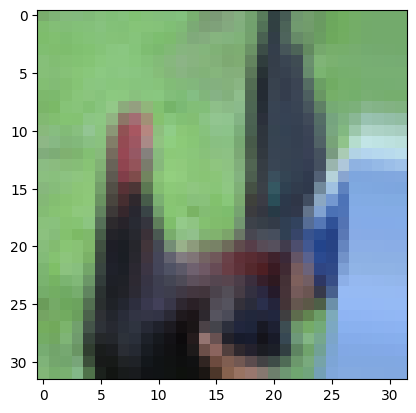

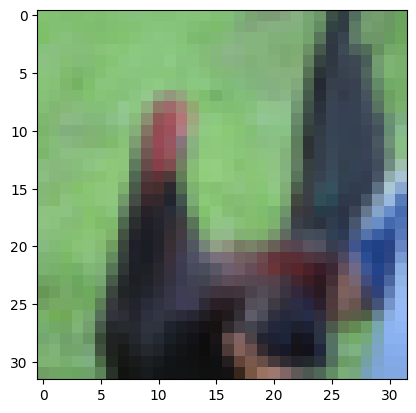

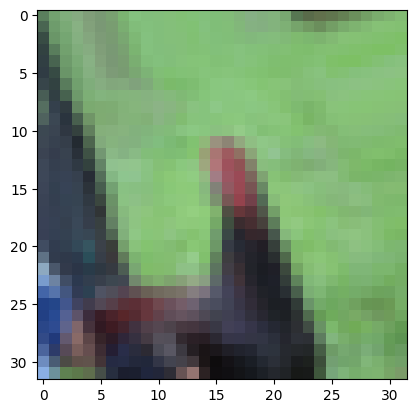

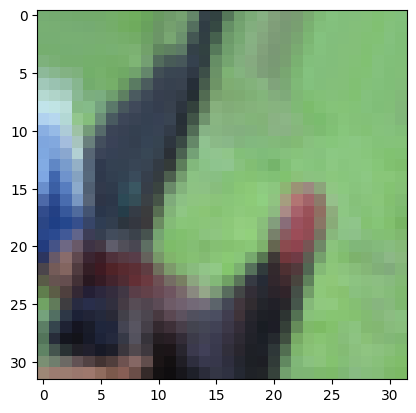

In [ ]:
i = 0
for batch in datagen.flow(img,save_prefix='test',save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0])) # each batch might have multiple images so ve use [0] to
                                                  # access first image of each batch, here we get 1 image per batch only
  i += 1
  if i>=4:
    break
  # plt.show()

In [ ]:
print(test_labels[25])

[2]
